In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
import scipy.io.wavfile

In [24]:
import wfdb
dbs = wfdb.get_dbs()
print(dbs)


[['aami-ec13', 'ANSI/AAMI EC13 Test Waveforms'], ['accelerometry-walk-climb-drive', 'Labeled raw accelerometry data captured during walking, stair climbing and driving'], ['actes-cycloergometer-exercise', 'Cardiorespiratory measurement from graded cycloergometer exercise testing'], ['adfecgdb', 'Abdominal and Direct Fetal ECG Database'], ['afdb', 'MIT-BIH Atrial Fibrillation Database'], ['afpdb', 'PAF Prediction Challenge Database'], ['aftdb', 'AF Termination Challenge Database'], ['ahadb', 'AHA Database Sample Excluded Record'], ['annotation-opioid-use-notes', 'Annotation dataset of problematic opioid use and related contexts from MIMIC-III Critical Care Database discharge summaries'], ['antimicrobial-resistance-uti', 'AMR-UTI: Antimicrobial Resistance in Urinary Tract Infections'], ['apnea-ecg', 'Apnea-ECG Database'], ['auditory-eeg', 'Auditory evoked potential EEG-Biometric dataset'], ['autonomic-aging-cardiovascular', 'Autonomic Aging: A dataset to quantify changes of cardiovascula

In [25]:
import wfdb
recs_list = wfdb.get_record_list('wrist')
print(recs_list)


['s1_high_resistance_bike', 's1_low_resistance_bike', 's1_walk', 's2_high_resistance_bike', 's2_low_resistance_bike', 's2_walk', 's3_high_resistance_bike', 's3_low_resistance_bike', 's3_run', 's3_walk', 's4_run', 's5_low_resistance_bike', 's5_run', 's6_low_resistance_bike', 's6_run', 's6_walk', 's8_run', 's8_walk', 's9_walk']


In [2]:
import numpy as np
import scipy.io as sio
import h5py
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import plotly.graph_objects as go
import plotly.express as px

In [3]:
data = sio.loadmat(os.path.join('/Users/jinyanwei/Desktop/person_1_hongxi_day_1_data.mat'))
print(data)
df = pd.DataFrame(data['data'], columns = ['BP','ECG','PPG'])
df.to_csv('predata.csv')

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Fri Jul 20 14:37:23 2018', '__version__': '1.0', '__globals__': [], 'data': array([[ 7.30000000e+01, -4.43725586e-01, -1.31744385e+00],
       [ 7.20000000e+01, -4.41894531e-01, -1.34582520e+00],
       [ 7.10000000e+01, -4.44335938e-01, -1.37390137e+00],
       ...,
       [ 6.30000000e+01, -4.27246094e-03,  1.65771484e+00],
       [ 6.30000000e+01, -6.10351562e-03,  1.64337158e+00],
       [ 6.30000000e+01, -7.93457031e-03,  1.62689209e+00]])}


chest_ecg: [[   4.98405564 1220.71518718]
 [  22.52054769 1219.81443919]
 [  18.45946532 1218.9842722 ]
 ...
 [ 427.15202754 1207.17035732]
 [ 417.18391627 1206.81745233]
 [ 414.5072938  1206.47463033]]
wrist_ppg: {'fs': 256, 'sig_len': 1500, 'n_sig': 2, 'base_date': None, 'base_time': None, 'units': ['mV', 'mV'], 'sig_name': ['chest_ecg', 'wrist_ppg'], 'comments': ['High resistance biking_level 6']}


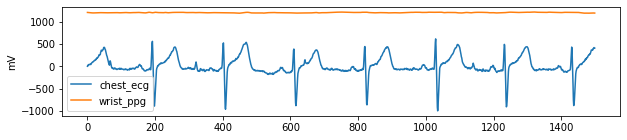

In [35]:
import wfdb
import matplotlib.pyplot as plt
import numpy as np
chest_ecg, wrist_ppg = wfdb.rdsamp('../wrist/s1_high_resistance_bike', channels=[0, 1], sampfrom=0, sampto=1500)
print('chest_ecg:', chest_ecg)
np.savetxt("temp.csv", chest_ecg, delimiter=",")
print('wrist_ppg:', wrist_ppg)



In [17]:
odf = pd.concat([df['ECG'][:3000], df['PPG'][:3000]], axis = 1)

In [18]:
norm_fig = px.line(odf)
norm_fig.show()

In [4]:
## 去轮廓outline
ecg_data = np.array(df['ECG'][:3000])
b, a = signal.butter(8, 0.01, 'lowpass')
ecg_outline_data = signal.filtfilt(b, a, ecg_data)
ecg_norm_data = ecg_data - ecg_outline_data  #数据类型<class 'numpy.ndarray'>
ecg_norm_df = pd.DataFrame(ecg_norm_data, columns = ['ECG'])

ppg_data = np.array(df['PPG'][:3000])
ppg_outline_data = signal.filtfilt(b, a, ppg_data)
ppg_norm_data = ppg_data - ppg_outline_data  #数据类型<class 'numpy.ndarray'>
ppg_norm_df = pd.DataFrame(ppg_norm_data, columns = ['PPG'])

bp_data = np.array(df['BP'][:3000])
bp_outline_data = signal.filtfilt(b, a, bp_data)
bp_norm_data = bp_data - bp_outline_data  #数据类型<class 'numpy.ndarray'>
bp_norm_df = pd.DataFrame(bp_norm_data, columns = ['BP'])

Norm_df = pd.concat([ecg_norm_df, ppg_norm_df, bp_norm_df], axis = 1)
# display(Norm_df)

## 将基线调至0
ecg_avg = sum(ecg_data) / len(ecg_data)
for i in range(len(ecg_data)):
    ecg_data[i] = ecg_data[i] - ecg_avg
ecg_df = pd.DataFrame(ecg_data, columns = ['ECG'])

ppg_avg = sum(ppg_data) / len(ppg_data)
for i in range(len(ppg_data)):
    ppg_data[i] = ppg_data[i] - ppg_avg
ppg_df = pd.DataFrame(ppg_data, columns = ['PPG'])

bp_avg = sum(bp_data) / len(bp_data)
for i in range(len(bp_data)):
    bp_data[i] = bp_data[i] - bp_avg
bp_df = pd.DataFrame(bp_data, columns = ['BP'])

Data_new_df = pd.concat([ecg_df, ppg_df, bp_df], axis = 1)
# display(Data_new_df)

## 绘图
norm_fig = px.line(Norm_df)
norm_fig.show()
data_new_fig = px.line(Data_new_df)
data_new_fig.show()

In [5]:
ppg_signal = Data_new_df['PPG']
ppg_signal

0      -1.265203
1      -1.293585
2      -1.321661
3      -1.350653
4      -1.379950
          ...   
2995   -1.843512
2996   -1.875860
2997   -1.908514
2998   -1.943914
2999   -1.978704
Name: PPG, Length: 3000, dtype: float64

In [6]:
from scipy.signal import butter, filtfilt

# Butterworth low-pass filter
def butter_lowpass_filter(data, cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, data)

fs = 1000  # sampling frequency (adjust according to your data)
cutoff = 5  # cutoff frequency for low-pass filtering (adjust as needed)
ppg_filtered = butter_lowpass_filter(ppg_signal, cutoff, fs)

In [7]:
import scipy.signal as signal

# Find peaks in the PPG signal
peaks, _ = signal.find_peaks(ppg_filtered, distance=fs//2.5)

# Calculate pulse rate (in beats per minute)
pulse_rate = 60 * fs / np.mean(np.diff(peaks))

# Calculate peak-to-peak time intervals
peak_to_peak_intervals = np.diff(peaks) / fs

# Calculate pulse width at half-maximum amplitude
pulse_widths = signal.peak_widths(ppg_filtered, peaks, rel_height=0.5)[0] / fs

# Calculate area under the curve
auc = np.trapz(ppg_filtered, dx=1/fs)

# Calculate power spectral density (PSD) and peak frequency
freqs, psd = signal.welch(ppg_filtered, fs)
peak_frequency = freqs[np.argmax(psd)]

# Calculate spectral entropy
spectral_entropy = -np.sum(psd * np.log2(psd))

# Compile features into a dictionary
features = {
    'pulse_rate': pulse_rate,
    'mean_peak_to_peak_interval': np.mean(peak_to_peak_intervals),
    'std_peak_to_peak_interval': np.std(peak_to_peak_intervals),
    'mean_pulse_width': np.mean(pulse_widths),
    'std_pulse_width': np.std(pulse_widths),
    'area_under_curve': auc,
    'peak_frequency': peak_frequency,
    'spectral_entropy': spectral_entropy
}

print(features)


{'pulse_rate': 96.89140088817118, 'mean_peak_to_peak_interval': 0.6192500000000001, 'std_peak_to_peak_interval': 0.14632391294658573, 'mean_pulse_width': 0.09624964235953432, 'std_pulse_width': 0.02519871648180504, 'area_under_curve': 0.06972006294983303, 'peak_frequency': 3.90625, 'spectral_entropy': 0.15500115988792393}


In [209]:
peaks

array([  73,  625, 1133, 1679, 2550])

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Load and preprocess the data (ECG and PPG features and BP values)
# Replace 'your_data.csv' with the actual file containing your preprocessed data
data = Data_new_df

# Extract the relevant features and target variable
X = data[['ECG', 'ECG', 'PPG', 'PPG']]
y = data['BP']

In [211]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='linear')
])

# Compile the model with the Adam optimizer and mean squared error loss
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model on the training data
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Predict blood pressure on the testing set
y_pred = model.predict(X_test)

# Evaluate the model performance
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")



Epoch 1/100
75/75 [==============================] - 1s 1ms/step - loss: 117.0211
Epoch 2/100
75/75 [==============================] - 0s 1ms/step - loss: 92.3118
Epoch 3/100
75/75 [==============================] - 0s 1ms/step - loss: 84.7651
Epoch 4/100
75/75 [==============================] - 0s 1ms/step - loss: 79.5666
Epoch 5/100
75/75 [==============================] - 0s 1ms/step - loss: 74.9836
Epoch 6/100
75/75 [==============================] - 0s 1ms/step - loss: 71.8886
Epoch 7/100
75/75 [==============================] - 0s 1ms/step - loss: 70.6795
Epoch 8/100
75/75 [==============================] - 0s 1ms/step - loss: 69.6384
Epoch 9/100
75/75 [==============================] - 0s 1ms/step - loss: 69.4253
Epoch 10/100
75/75 [==============================] - 0s 1ms/step - loss: 68.5514
Epoch 11/100
75/75 [==============================] - 0s 1ms/step - loss: 67.8216
Epoch 12/100
75/75 [==============================] - 0s 1ms/step - loss: 67.1411
Epoch 13/100
75/75 [====

In [177]:
ecgdd = np.array(df['ECG'][:3000])
ecgdd

array([-0.44372559, -0.44189453, -0.44433594, ..., -0.75683594,
       -0.74951172, -0.73974609])

In [9]:
## 去轮廓outline
ecg_data = np.array(df['ECG'])
b, a = signal.butter(8, 0.01, 'lowpass')
ecg_outline_data = signal.filtfilt(b, a, ecg_data)
ecg_norm_data = ecg_data - ecg_outline_data  #数据类型<class 'numpy.ndarray'>
ecg_norm_df = pd.DataFrame(ecg_norm_data, columns = ['ECG'])

ppg_data = np.array(df['PPG'])
ppg_outline_data = signal.filtfilt(b, a, ppg_data)
ppg_norm_data = ppg_data - ppg_outline_data  #数据类型<class 'numpy.ndarray'>
ppg_norm_df = pd.DataFrame(ppg_norm_data, columns = ['PPG'])

bp_data = np.array(df['BP'])
bp_outline_data = signal.filtfilt(b, a, bp_data)
bp_norm_data = bp_data - bp_outline_data  #数据类型<class 'numpy.ndarray'>
bp_norm_df = pd.DataFrame(bp_norm_data, columns = ['BP'])

Norm_df = pd.concat([ecg_norm_df, ppg_norm_df, bp_norm_df], axis = 1)
# display(Norm_df)

## 将基线调至0
ecg_avg = sum(ecg_data) / len(ecg_data)
for i in range(len(ecg_data)):
    ecg_data[i] = ecg_data[i] - ecg_avg
ecg_df = pd.DataFrame(ecg_data, columns = ['ECG'])

ppg_avg = sum(ppg_data) / len(ppg_data)
for i in range(len(ppg_data)):
    ppg_data[i] = ppg_data[i] - ppg_avg
ppg_df = pd.DataFrame(ppg_data, columns = ['PPG'])

bp_avg = sum(bp_data) / len(bp_data)
for i in range(len(bp_data)):
    bp_data[i] = bp_data[i] - bp_avg
bp_df = pd.DataFrame(bp_data, columns = ['BP'])

pro_df = pd.concat([ecg_df, ppg_df, bp_df], axis = 1)
pro_df.to_csv('prodata.csv')
# display(Data_new_df)

In [230]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Load and preprocess the data (ECG and PPG signals and BP values)
# Replace 'your_data.csv' with the actual file containing your preprocessed data
data = pd.read_csv('prodata.csv')

# Extract the relevant features and target variable
X = data[['ECG', 'PPG']]
y = data['BP']

# Reshape the input data for the 1D CNN
X = np.array(X).reshape(X.shape[0], X.shape[1], 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the 1D CNN model
model = Sequential([
    Conv1D(32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=1),
    Conv1D(64, kernel_size=1, activation='relu'),
    MaxPooling1D(pool_size=1),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')
])

# Compile the model with the Adam optimizer and mean squared error loss
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model on the training data
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Predict blood pressure on the testing set
y_pred = model.predict(X_test)

# Evaluate the model performance
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")


Epoch 1/100
2406/2406 [==============================] - 3s 1ms/step - loss: 89.8838
Epoch 2/100
2406/2406 [==============================] - 2s 1ms/step - loss: 83.5860
Epoch 3/100
2406/2406 [==============================] - 3s 1ms/step - loss: 82.9876
Epoch 4/100
2406/2406 [==============================] - 3s 1ms/step - loss: 82.7596
Epoch 5/100
2406/2406 [==============================] - 3s 1ms/step - loss: 82.3252
Epoch 6/100
2406/2406 [==============================] - 3s 1ms/step - loss: 82.2665
Epoch 7/100
2406/2406 [==============================] - 2s 1ms/step - loss: 82.0877
Epoch 8/100
2406/2406 [==============================] - 3s 1ms/step - loss: 81.8058
Epoch 9/100
2406/2406 [==============================] - 3s 1ms/step - loss: 81.6468
Epoch 10/100
2406/2406 [==============================] - 3s 1ms/step - loss: 81.3704
Epoch 11/100
2406/2406 [==============================] - 3s 1ms/step - loss: 81.2224
Epoch 12/100
2406/2406 [==============================] - 3s 1m

19/19 [==============================] - 0s 5ms/step


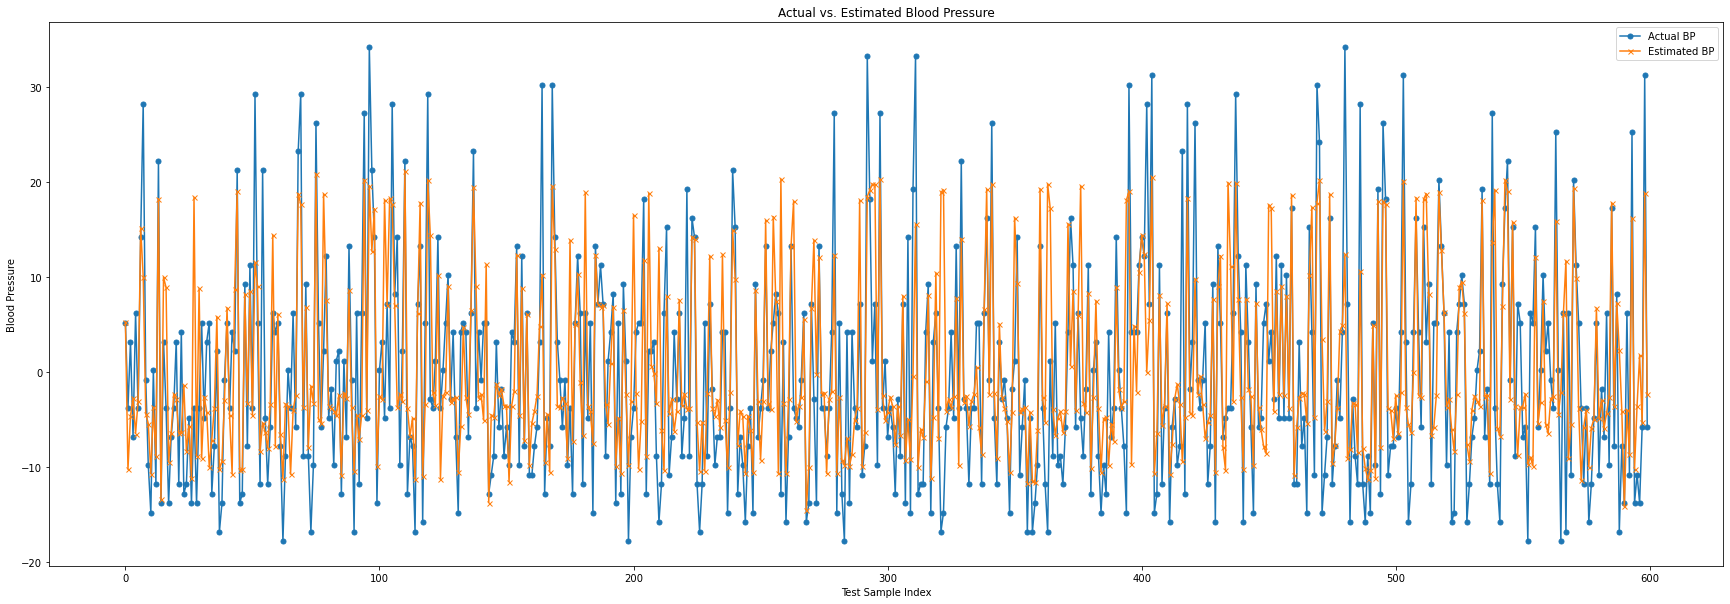

In [168]:
import matplotlib.pyplot as plt

# Predict blood pressure on the testing set
y_pred = model.predict(X_test).flatten()

# Plot actual vs. estimated blood pressure
plt.figure(figsize=(30, 10))
plt.plot(y_test.values, label='Actual BP', marker='o', linestyle='-', markersize=5)
plt.plot(y_pred, label='Estimated BP', marker='x', linestyle='-', markersize=5)
plt.xlabel('Test Sample Index')
plt.ylabel('Blood Pressure')
plt.legend()
plt.title('Actual vs. Estimated Blood Pressure')
plt.show()


In [153]:
bpdf = pd.DataFrame({'Actu_BP': list(i for i in y_test), 'Esti_BP': y_pred, })
# bpdf.rename(columns={'0':'Esti_BP'})
#bpdf.reset_index(drop=True)
bpdf

,Actu_BP,Esti_BP
0,50.0,57.227474
1,61.0,60.191799
2,58.0,63.362411
3,63.0,64.285599
4,57.0,60.187351
...,...,...
19238,63.0,66.279877
19239,71.0,74.003983
19240,73.0,62.008167
19241,60.0,62.535385


In [154]:
shdf = bpdf[:300]

In [155]:
norm_fig = px.line(shdf)
norm_fig.show()

In [227]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

# Load and preprocess the data (ECG and PPG signals and BP values)
# Replace 'your_data.csv' with the actual file containing your preprocessed data
data = pd.read_csv('prodata.csv')

# Extract the relevant features and target variable
X = data[['ECG', 'PPG']]
y = data['BP']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict blood pressure on the testing set
y_pred = rf_model.predict(X_test)

# Evaluate the model performance
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")


Mean Absolute Error: 6.650348529953996


In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import Conv1D, LSTM, Dense


def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length, :-1])
        y.append(data[i+seq_length-1, -1])
    return np.array(X), np.array(y)

# Load and preprocess the data (ECG and PPG signals and BP values)
# Replace 'your_data.csv' with the actual file containing your preprocessed data
data = pd.read_csv('prodata.csv')

# Convert the DataFrame to a NumPy array
data = data.to_numpy()

# Define the sequence length (number of time steps in each input sequence)
seq_length = 30  # Adjust this value based on your specific dataset and application

# Create sequences of ECG and PPG signals and corresponding BP values
X, y = create_sequences(data, seq_length)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the LSTM model
model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    LSTM(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Predict blood pressure on the testing set
y_pred = model.predict(X_test)

# Evaluate the model performance
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")


Epoch 1/10
1924/1924 [==============================] - 24s 12ms/step - loss: 672008.6250 - val_loss: 157.5324
Epoch 2/10
1924/1924 [==============================] - 23s 12ms/step - loss: 156.7979 - val_loss: 157.4904
Epoch 3/10
1924/1924 [==============================] - 24s 13ms/step - loss: 222.3254 - val_loss: 157.4254
Epoch 4/10
1924/1924 [==============================] - 23s 12ms/step - loss: 9260.0508 - val_loss: 204.8527
Epoch 5/10
1924/1924 [==============================] - 25s 13ms/step - loss: 72706.3750 - val_loss: 157.5058
Epoch 6/10
1924/1924 [==============================] - 22s 12ms/step - loss: 176.5290 - val_loss: 157.5784
Epoch 7/10
1924/1924 [==============================] - 22s 12ms/step - loss: 156.8608 - val_loss: 157.5740
Epoch 8/10
1924/1924 [==============================] - 21s 11ms/step - loss: 156.7944 - val_loss: 157.5560
Epoch 9/10
1924/1924 [==============================] - 22s 11ms/step - loss: 157.1669 - val_loss: 157.5686
Epoch 10/10
602/602 [=